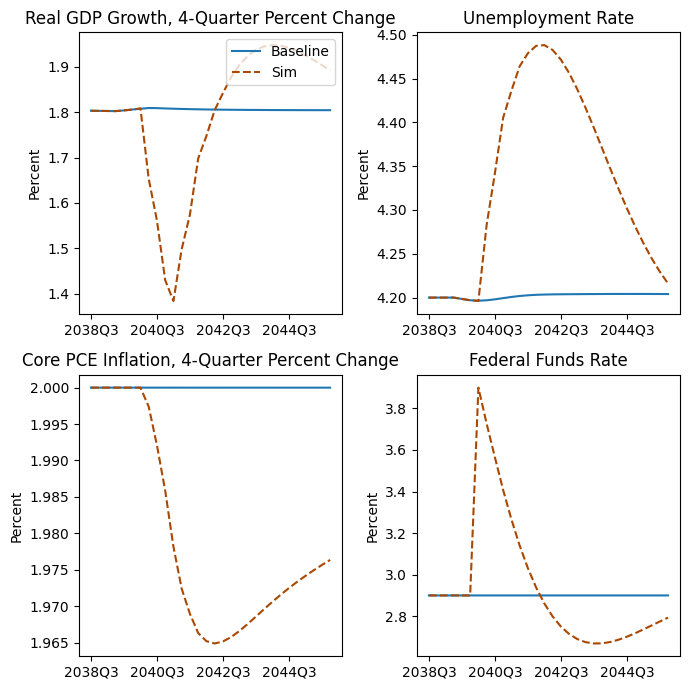

In [1]:
import pandas
import sys

sys.path.append("/workspace/wh_demo/pyfrbus")
from pyfrbus.frbus import Frbus
from pyfrbus.sim_lib import sim_plot
from pyfrbus.load_data import load_data


# Load data
data = load_data("/workspace/wh_demo/pyfrbus/data/LONGBASE.TXT")

# Load model
frbus = Frbus("/workspace/wh_demo/pyfrbus/models/model.xml")

# Specify dates
start = pandas.Period("2040Q1")
end = start + 23

# Standard configuration, use surplus ratio targeting
data.loc[start:end, "dfpdbt"] = 0
data.loc[start:end, "dfpsrp"] = 1

# Solve to baseline with adds
with_adds = frbus.init_trac(start, end, data)

# 100 bp monetary policy shock and solve
with_adds.loc[start, "rffintay_aerr"] += 1
sim = frbus.solve(start, end, with_adds)

# View results
sim_plot(with_adds, sim, start, end)
